# Sara Zahmatkesh 
https://www.kaggle.com/sarazahmatkesh

#  Logreg, vs. Naive Bayes, vs. KNN modeling for Banking Loan Offer

In [22]:
import pandas as pd                                   # Importing Libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier

In [23]:
data = pd.read_csv ('Bank_Personal_Loan_Modelling(1).csv')   # reading the dataset 
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [24]:
df1= pd.DataFrame (data)

# DATA Preprocessing & Visualizations:

In [25]:
df1.describe ()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [26]:
df1.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [27]:
df1.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No Missing Values (NaNs)/ BUT We have an object column of 'CCavg'

<span style="color:blue">**Converting fraction values in 'CCAvg' column to floats**</span>


In [28]:
def fraction_to_percentage(fraction):              # Function to convert fraction strings to percentage integers
    try:                                             
        if isinstance(fraction, float):            # Check if the input is already a float
            return fraction
        numerator, denominator = map(float, fraction.split('/'))
        if denominator == 0:
            return 0                               # The customer didn't have a credit card 
        return (numerator / denominator) * 100
    except (ValueError, AttributeError):
        return 0                                   
 

df1['CCAvg'] = df1['CCAvg'].apply(fraction_to_percentage)   # Apply the function to 'CCAvg' and create float values


df1.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,3.808856,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,7.583509,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.250000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,4.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,80.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Text(0.5, 0, 'CreditCard')

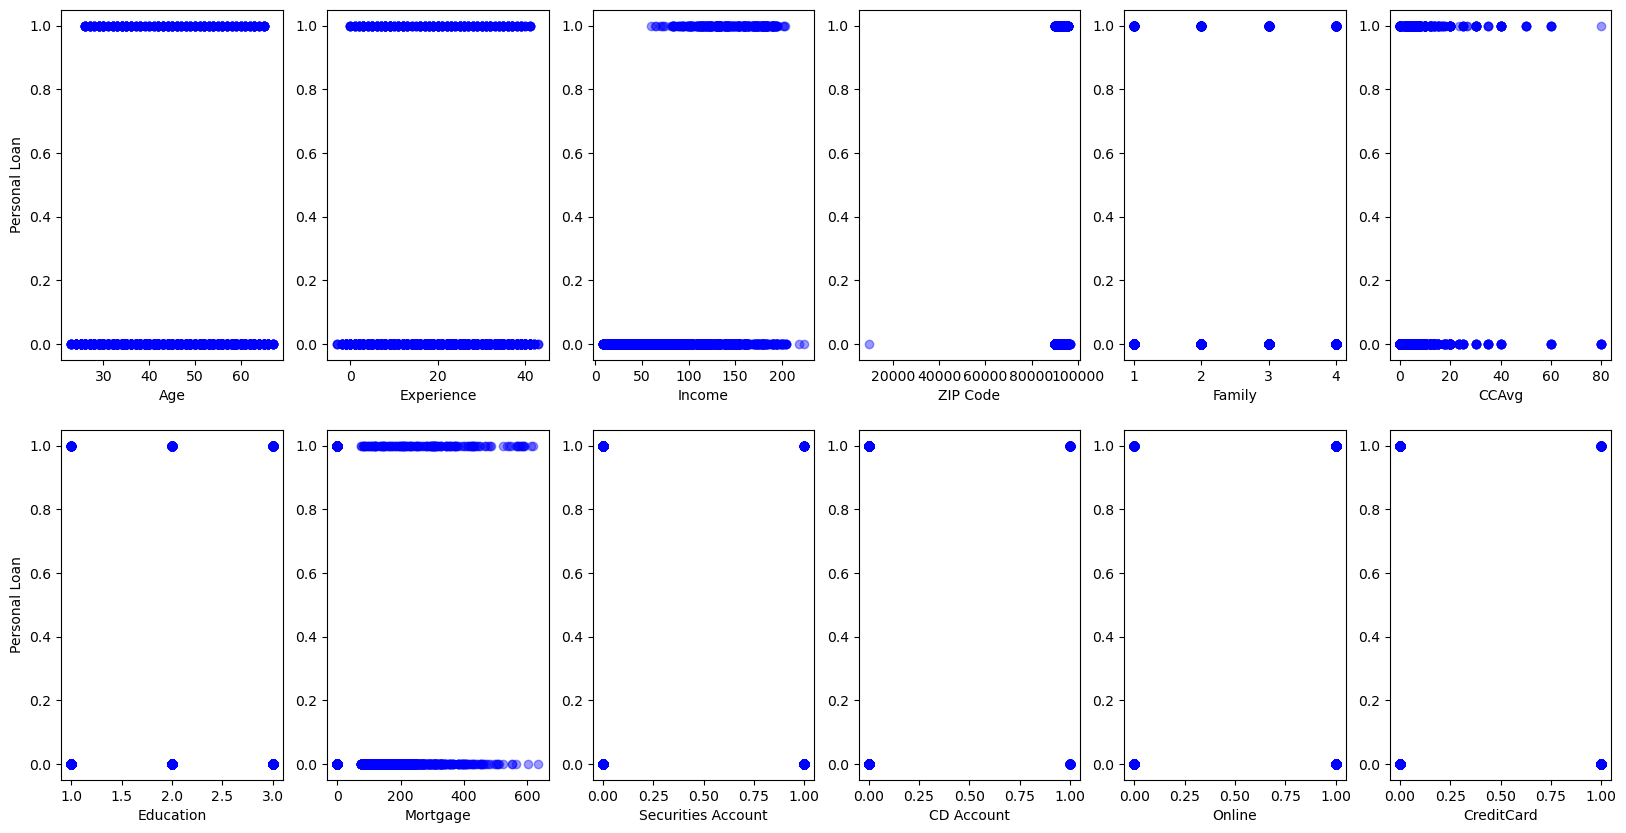

In [29]:
# Create a figure with 12 subplots in 2 rows and 6 columns 
fig, axs = plt.subplots(2, 6, figsize=(20, 10))


axs[0, 0].scatter(df1['Age'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Personal Loan')
axs[0, 1].scatter(df1['Experience'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[0, 1].set_xlabel('Experience')
axs[0, 2].scatter(df1['Income'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[0, 2].set_xlabel('Income')
axs[0, 3].scatter(df1['ZIP Code'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[0, 3].set_xlabel('ZIP Code')
axs[0, 4].scatter(df1['Family'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[0, 4].set_xlabel('Family')
axs[0, 5].scatter(df1['CCAvg'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[0, 5].set_xlabel('CCAvg')

axs[1, 0].scatter(df1['Education'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[1, 0].set_xlabel('Education')
axs[1, 0].set_ylabel('Personal Loan')
axs[1, 1].scatter(df1['Mortgage'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[1, 1].set_xlabel('Mortgage')
axs[1, 2].scatter(df1['Securities Account'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[1, 2].set_xlabel('Securities Account')
axs[1, 3].scatter(df1['CD Account'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[1, 3].set_xlabel('CD Account')
axs[1, 4].scatter(df1['Online'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[1, 4].set_xlabel('Online')
axs[1, 5].scatter(df1['CreditCard'], df1['Personal Loan'], color='blue', linewidth=1, alpha=0.4)
axs[1, 5].set_xlabel('CreditCard')

**It seems that some features are giving us information.**
- Young and old customers do not accept loan. 
- less and much experience leads to not accepting loan.
- those who use credit cards 20-60 %, most probably accept the loan offer. 
- those who has more than 60 income, approve the loan offer. 
- those with low income do not accept the loan.

<span style="color:blue">**data preprocess on ZIP Codes and Experinece**</span>


Text(0.5, 0, 'Experience')

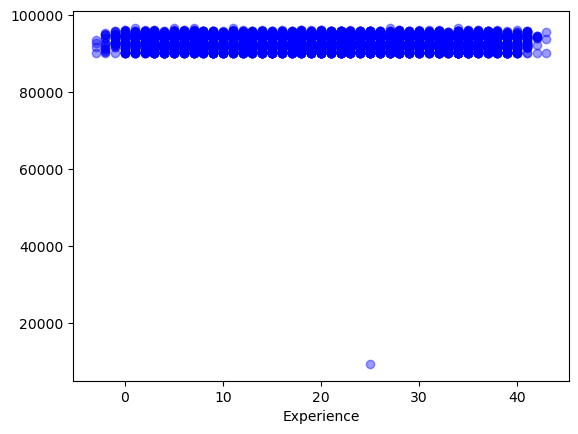

In [30]:
df1.columns = [col.replace(' ', '_') for col in df1.columns]    # rename column names with space 
plt.scatter(df1['Experience'], df1['ZIP_Code'], color='blue', linewidth=1, alpha=0.4)    
plt.xlabel('Experience')   

In [31]:
df1 = df1[df1['ZIP_Code'] >= 80000]                                            #Remove a noise datapoint in Zip Code
df1['ZIP_Code'] = df1['ZIP_Code'].apply(lambda x: 95651 if x == 96651 else x)  #convert out of range Zip codes to correct ones 
df1['Experience'] = df1['Experience'].apply(lambda x: 0 if x < 0 else x)       # convert negative experience to 0 
df1.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.923185,45.337267,20.118624,73.784757,93168.075215,2.396079,3.809618,1.880776,56.510102,0.096019,0.104421,0.060412,0.596719,0.293859
std,1443.354188,11.464033,11.441420,46.032281,1757.594788,1.147554,7.584076,0.839804,101.720837,0.294647,0.305836,0.238273,0.490605,0.455574
min,1.000000,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1251.500000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2501.000000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.250000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.500000,55.000000,30.000000,98.000000,94608.000000,3.000000,4.000000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96150.000000,4.000000,80.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Experience')

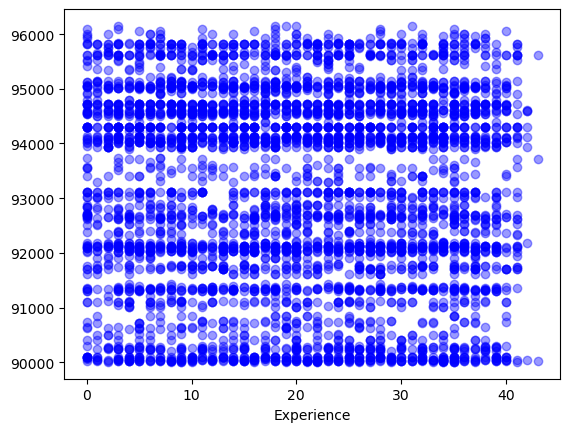

In [32]:
plt.scatter(df1['Experience'], df1['ZIP_Code'], color='blue', linewidth=1, alpha=0.4)
plt.xlabel('Experience')                       # Visualization of noise removal 

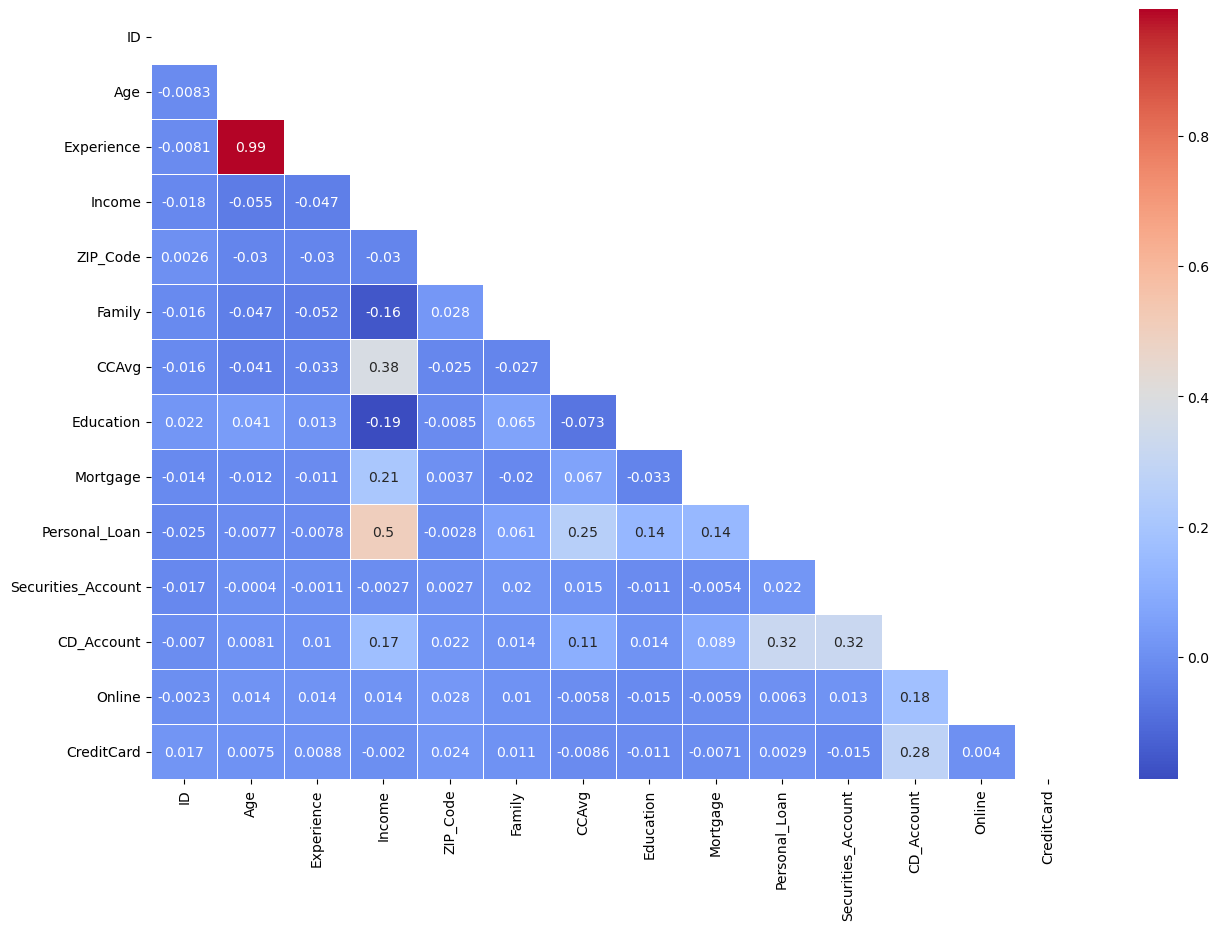

In [33]:
plt.figure(figsize=(15,10))                 # correlation between features 
sns.heatmap(df1.corr(numeric_only=True), annot=True,linewidth=.5,cmap="coolwarm",mask=np.triu(df1.corr(numeric_only=True)));

**Most influential features are:**
- Income 
- CCAvg
- Education 
- Mortgage 
- CD Account 
- Family size 

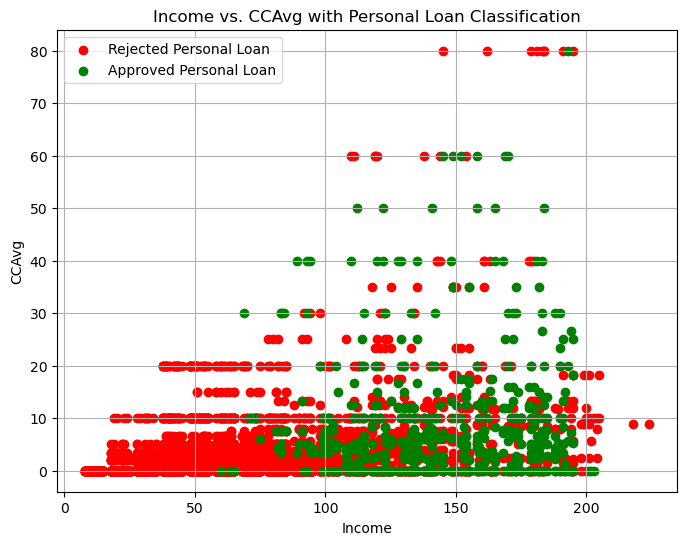

In [35]:
no_loan = df1[df1['Personal_Loan'] == 0]
loan = df1[df1['Personal_Loan'] == 1]

plt.figure(figsize=(8, 6))
plt.scatter(no_loan['Income'], no_loan['CCAvg'], color='red', label='Rejected Personal Loan')
plt.scatter(loan['Income'], loan['CCAvg'], color='green', label='Approved Personal Loan')
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.title('Income vs. CCAvg with Personal Loan Classification')
plt.legend()
plt.grid(True)
plt.show()

**Individuals with income between 100-200 and credit card utilization less than 20% (more specifically 10%), approved the offer of personal loan**

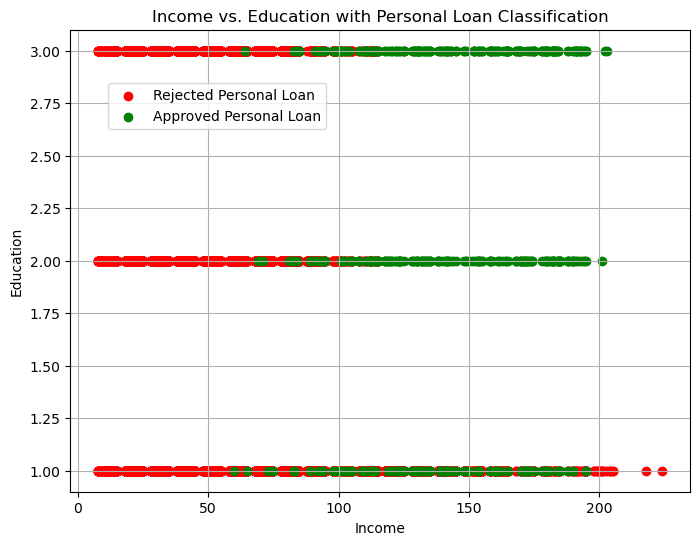

In [36]:
no_loan = df1[df1['Personal_Loan'] == 0]
loan = df1[df1['Personal_Loan'] == 1]

plt.figure(figsize=(8, 6))
plt.scatter(no_loan['Income'], no_loan['Education'], color='red', label='Rejected Personal Loan')
plt.scatter(loan['Income'], loan['Education'], color='green', label='Approved Personal Loan')
plt.xlabel('Income')
plt.ylabel('Education')
plt.title('Income vs. Education with Personal Loan Classification')
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.9)) 
plt.grid(True)
plt.show()

**Higher Education increase the chance of loan offer approval (For suitable income range)**

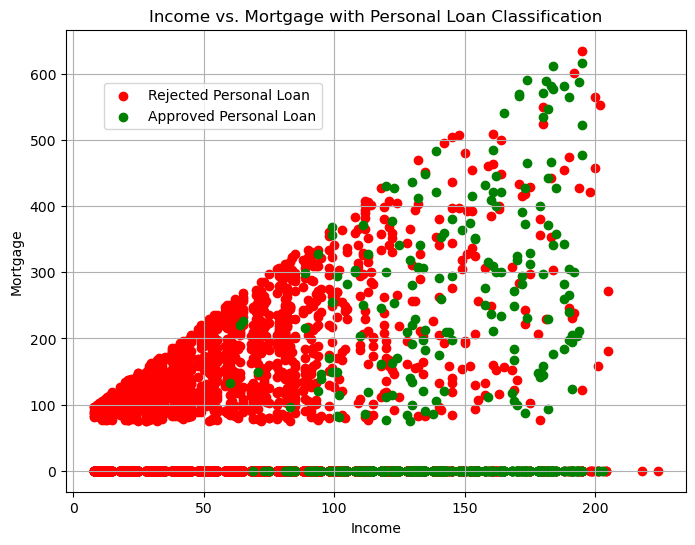

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(no_loan['Income'], no_loan['Mortgage'], color='red', label='Rejected Personal Loan')
plt.scatter(loan['Income'], loan['Mortgage'], color='green', label='Approved Personal Loan')
plt.xlabel('Income')
plt.ylabel('Mortgage')
plt.title('Income vs. Mortgage with Personal Loan Classification')
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.9)) 
plt.grid(True)
plt.show()

**As the income increases, the value of house morgages increase, and this increase the chance of loan offer approval**

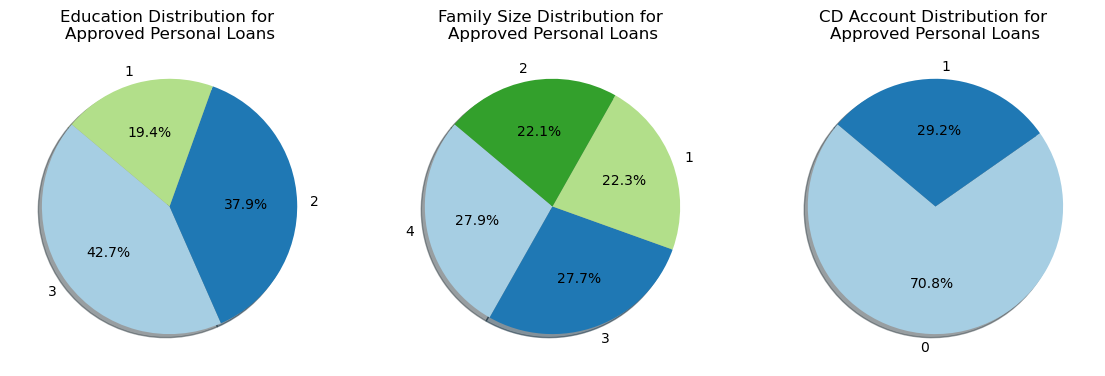

In [38]:

# Create a figure with 3 subplots in 1 rows and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(14, 20))

filtered_df2 = df1[(df1['Personal_Loan'] == 1)]
# Calculate the percentage distribution of 'Education' feature for 'Personal Loan == 1'
education_counts = filtered_df2['Education'].value_counts(normalize=True) * 100

# Plot the pie chart for the 'Education' distribution
axs[0].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', shadow=True, startangle=140, colors=plt.cm.Paired.colors)
axs[0].set_title('Education Distribution for \nApproved Personal Loans')

# Calculate the percentage distribution of 'Family' feature for 'Personal Loan == 1'
Family_counts = filtered_df2['Family'].value_counts(normalize=True) * 100

# Plot the pie chart for the 'Family' distribution
axs[1].pie(Family_counts, labels=Family_counts.index, autopct='%1.1f%%', shadow=True, startangle=140, colors=plt.cm.Paired.colors)
axs[1].set_title('Family Size Distribution for \nApproved Personal Loans')

# Calculate the percentage distribution of 'CD Account' feature for 'Personal Loan == 1'
CD_Account_counts = filtered_df2['CD_Account'].value_counts(normalize=True) * 100

# Plot the pie chart for the 'CD_Account' distribution
axs[2].pie(CD_Account_counts, labels=CD_Account_counts.index, autopct='%1.1f%%', shadow=True, startangle=140, colors=plt.cm.Paired.colors)
axs[2].set_title('CD Account Distribution for \nApproved Personal Loans')


plt.show()

# The pie plots give good information for the history of loan approvals:
**- Higher Graduate Education**

**- Larger Family sizes (3 & 4)**

**- No CD Acccounts**

C:\Users\Sara\AppData\Local\Temp\ipykernel_13004\2179419775.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2.loc[:, 'Income_bin'] = pd.cut(filtered_df2['Income'], bins=income_bins, labels=income_labels)
C:\Users\Sara\AppData\Local\Temp\ipykernel_13004\2179419775.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2.loc[:, 'CCAvg_bin'] = pd.cut(filtered_df2['CCAvg'], bins=ccavg_bins, labels=ccavg_labels)
C:\Users\Sara\AppData\Local\Temp\ipykernel_13004\2179419775.py:47: SettingWi

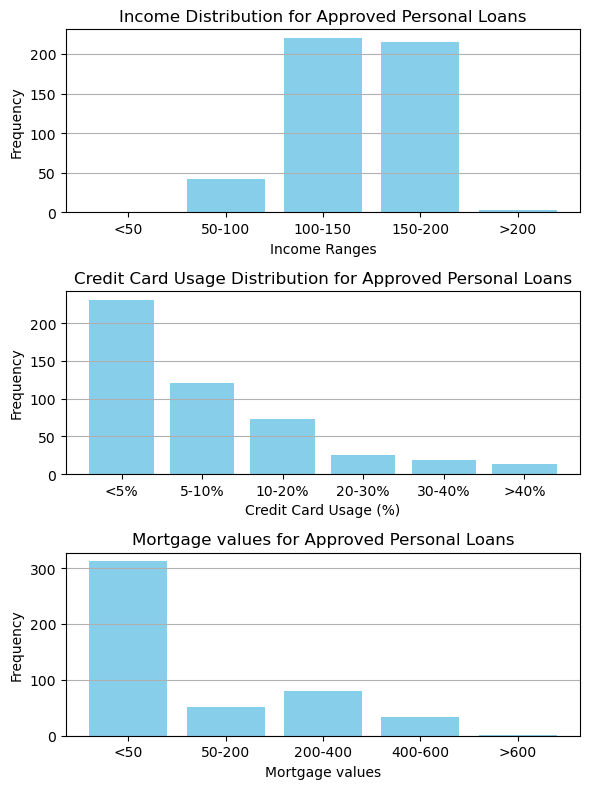

In [39]:
# for other influential features, I define margins to plot barplots 


# Create a figure with 3 subplots in 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

filtered_df2 = df1[(df1['Personal_Loan'] == 1)]
# Define bins and labels for the 'Income' values
income_bins = [-float('inf'), 50, 100, 150, 200, float('inf')]
income_labels = ['<50', '50-100', '100-150', '150-200', '>200']

# Bin the 'Income' values using .loc to avoid the warning
filtered_df2.loc[:, 'Income_bin'] = pd.cut(filtered_df2['Income'], bins=income_bins, labels=income_labels)

# Calculate the frequency of rows in each income bin
income_counts = filtered_df2['Income_bin'].value_counts().sort_index()

# Plot the bar chart for the 'Income' distribution
axs[0].bar(income_counts.index, income_counts, color='skyblue')
axs[0].set_xlabel('Income Ranges')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Income Distribution for Approved Personal Loans')
axs[0].grid(axis='y')

# Define bins and labels for the 'CCAvg' values
ccavg_bins = [-float('inf'), 5, 10, 20, 30, 40, float('inf')]
ccavg_labels = ['<5%', '5-10%', '10-20%', '20-30%', '30-40%', '>40%']

# Bin the 'CCAvg' values using .loc to avoid the warning
filtered_df2.loc[:, 'CCAvg_bin'] = pd.cut(filtered_df2['CCAvg'], bins=ccavg_bins, labels=ccavg_labels)

# Calculate the frequency of rows in each ccavg bin
ccavg_counts = filtered_df2['CCAvg_bin'].value_counts().sort_index()

# Plot the bar chart for the 'CCAvg' distribution
axs[1].bar(ccavg_counts.index, ccavg_counts, color='skyblue')
axs[1].set_xlabel('Credit Card Usage (%)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Credit Card Usage Distribution for Approved Personal Loans')
axs[1].grid(axis='y')

# Define bins and labels for the 'Mortgage' values
mor_bins = [-float('inf'), 50, 200, 400, 600, float('inf')]
mor_labels = ['<50', '50-200', '200-400', '400-600', '>600']

# Bin the 'Mortgage' values using .loc to avoid the warning
filtered_df2.loc[:, 'mor'] = pd.cut(filtered_df2['Mortgage'], bins=mor_bins, labels=mor_labels)

# Calculate the frequency of rows in each Mortgage bin
mor_counts = filtered_df2['mor'].value_counts().sort_index()

# Plot the bar chart for the 'Mortgage' distribution
axs[2].bar(mor_counts.index, mor_counts, color='skyblue')
axs[2].set_xlabel('Mortgage values')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Mortgage values for Approved Personal Loans')
axs[2].grid(axis='y')


# Display the plot
plt.tight_layout()
plt.show()

<span style="color:blue"> **The bar plots give good information for the history of loan approvals:**
    
**- Income between 100-200**

**- Less utilization of credit cards**

**- No Mortgages, if yes, the value between 200-400**


# Machine Learning Algorithms</span>

<span style="color:brown">**First Algorithm: Logistic Regression**</span>


In [40]:
print(df1.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [64]:
x = df1.drop(columns=['Personal_Loan', 'ID'])   #as ID doesn't give any information
y = df1.Personal_Loan.values.reshape (-1,1)
x_train, x_test, y_train, y_test = train_test_split ( x , y , test_size = 0.2, random_state = 0)  #80-20 train-test size is the best

In [74]:
logreg = LogisticRegression (solver='lbfgs',max_iter=5000)    #'lbfgs' solver to use L2 and L1 regularization & eliminate chance of Overfitting 
logreg.fit (x_train, y_train.ravel())
y_pred = logreg.predict (x_test)
print ("Accuracy:", metrics.accuracy_score (y_test, y_pred))

Accuracy: 0.937


**The tried solvers and their accuracy are:**

**1- "liblinear": 0.907  - L1 regularization**

**2- "newton_cg":  0.945 (With convergence Error) - L2 regularization**

**3- "lbfgs": 0.937       - faster convergance - Both L1 and L2** 

**4- "saga" & "saga": 0.905  - L2 regularization**

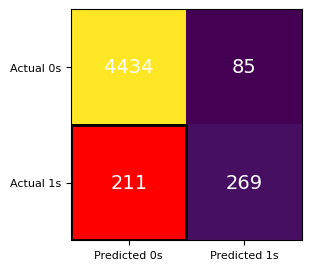

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4519
           1       0.76      0.56      0.65       480

    accuracy                           0.94      4999
   macro avg       0.86      0.77      0.81      4999
weighted avg       0.94      0.94      0.94      4999



In [75]:
cm = confusion_matrix (y , logreg.predict (x))
fig, ax = plt.subplots (figsize = (5,3))
ax.imshow (cm)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Predicted 0s', 'Predicted 1s'], fontsize=8)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Actual 0s', 'Actual 1s'], fontsize=8)

for i in range (2):
    for j in range (2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=14)
rect = plt.Rectangle((0 - 0.5, 1 - 0.5), 1, 1, linewidth=2, edgecolor='black', facecolor='red')
ax.add_patch(rect)        
plt.show ()
print ( classification_report (y,logreg.predict(x)))

**To increase the model prediction for this dataset:**

1- The red box in the above confusion matrix respresents **"False negatives"**, which should be lowest, beceause we do not want to loose any potential customer.
 
2- **"True Negatives"** are more than **"True Positives"** because there are large amount of datapoint for '0 Personal loan'  *50 times of '1 Presonal loans'* 

3- In this model, **False Positives** must increase and **False Negatives** must decrease as we want to increase the Sale amount by offering suitable clients. 

<span style="color:brown">**Second Algorithms: Naive Bayes**</span>

**1- Guassian Naive Bayes** Over continuous features 

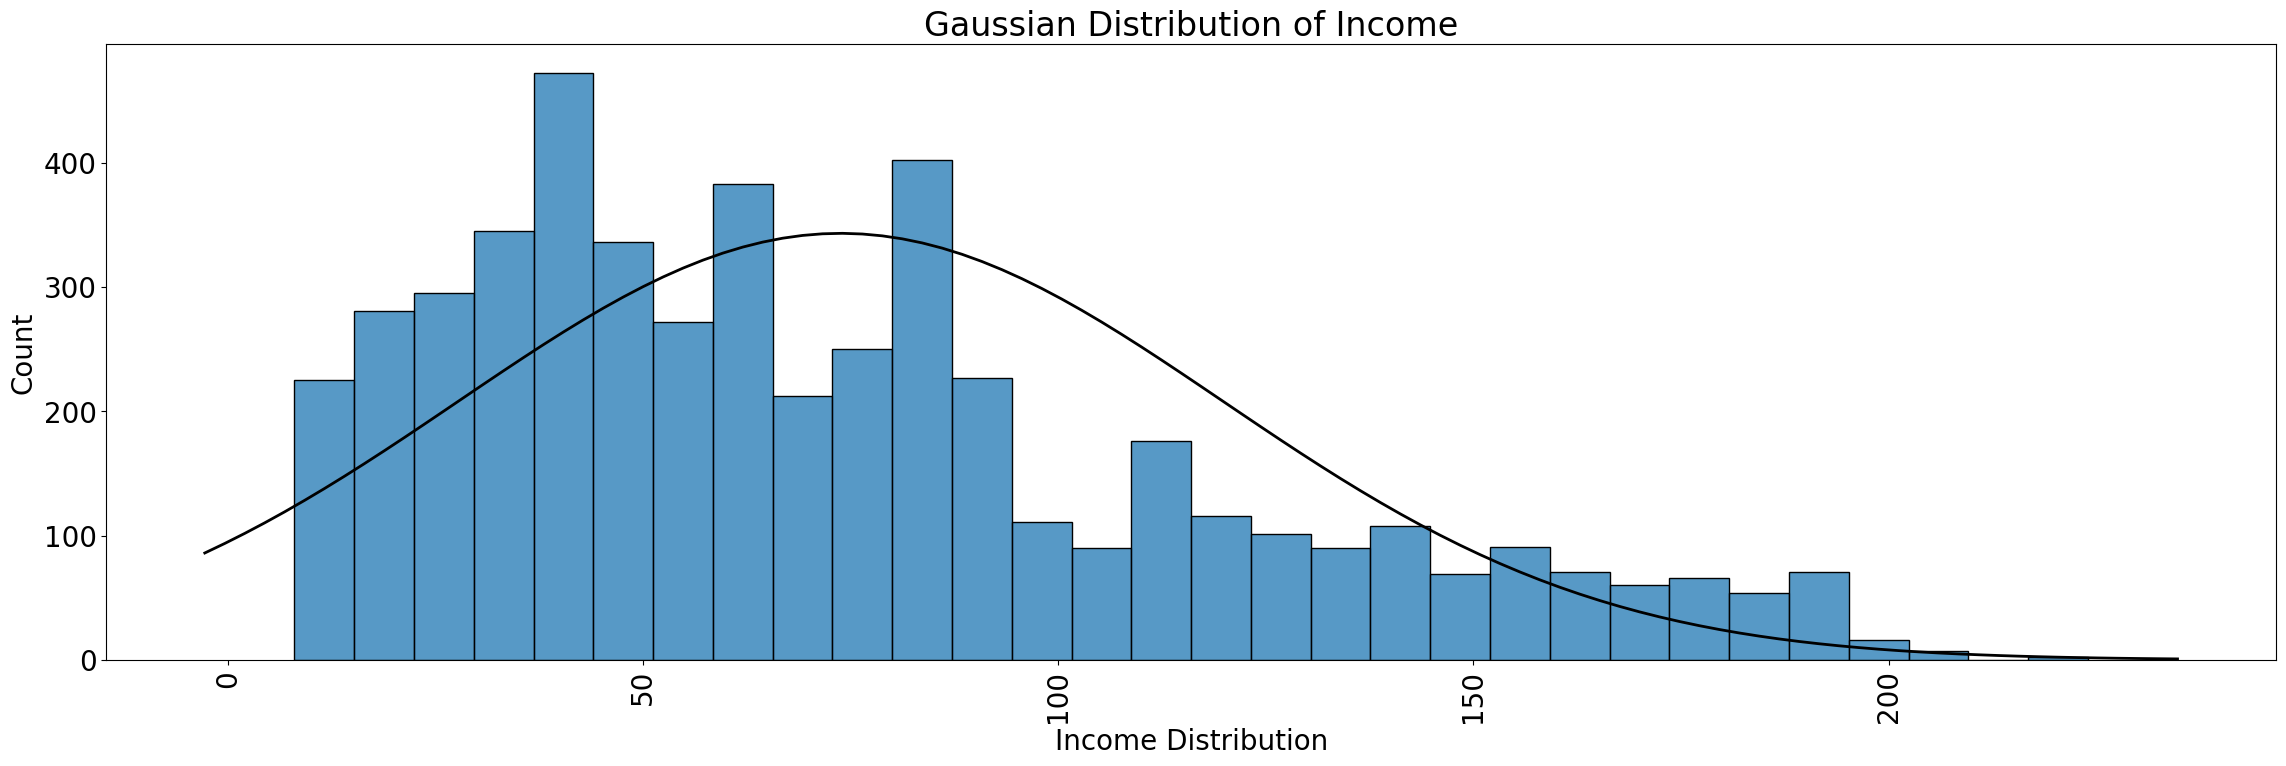

In [76]:
from scipy.stats import norm
                                  # Plot the histogram using seaborn's histplot for continuous data
plt.figure(figsize=(28, 8))
ax = sns.histplot(df1['Income'], kde=False, bins=30)  # Adjust the number of bins as necessary
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Income Distribution", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Gaussian Distribution of Income", fontsize=24)

income_data = df1['Income'].values            # Fit a Gaussian distribution to the income data
mu, std = norm.fit(income_data)

xmin, xmax = plt.xlim()                       # Create a range of values for the x-axis
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std)                      # Calculate the y values of the Gaussian curve

# Scale the Gaussian curve to match the histogram
bin_width = (xmax - xmin) / 30  # Same number of bins as used in sns.histplot
p_scaled = p * len(income_data) * bin_width

plt.plot(x, p_scaled, 'k', linewidth=2)

plt.show()

In [82]:
df2= df1.copy()
x2 = df2.drop(columns=['Personal_Loan', 'ID', 'ZIP_Code','Family', 'Education', 'Securities_Account', 
                      'CD_Account', 'Online', 'CreditCard'])   #ID doesn't give any information
                                                               # Personal Loan is target 
                                                               # others are discrete features not continuous 
y2 = df2.Personal_Loan.values.reshape (-1,1)
x2_train, x2_test, y2_train, y2_test = train_test_split (x2, y2, test_size = 0.3, random_state = 0)
clf = GaussianNB ()
clf.fit (x2_train,y2_train.ravel())
y2_pred = clf.predict (x2_test)

print ("Accuracy:", metrics.accuracy_score (y2_test,y2_pred))


Accuracy: 0.892


*Applying cross validation*

In [83]:
k_fold = KFold (5)
print (cross_val_score (clf, x2, y2.ravel(), cv = k_fold, n_jobs = 1))

[0.904      0.887      0.89       0.9        0.90990991]


In [84]:
df3 = df2[df2.index < 1000]
df4 = df2[df2.index > 2000]
df5 = pd.concat([df3, df4])
df5.reset_index(drop=True, inplace=True)

In [85]:
x2_new = df5.drop(columns=['Personal_Loan', 'ID', 'ZIP_Code','Family', 'Education', 'Securities_Account', 
                      'CD_Account', 'Online', 'CreditCard'])   #ID doesn't give any information
                                                               # Personal Loan is target 
                                                               # others are discrete features not continuous 
y2_new = df5.Personal_Loan.values.reshape (-1,1)
x2_new_train, x2_new_test, y2_new_train, y2_new_test = train_test_split (x2_new, y2_new, test_size = 0.25, random_state = 0)
clf2_new = GaussianNB ()
clf2_new.fit (x2_new_train,y2_new_train.ravel())
y2_new_pred = clf2_new.predict (x2_new_test)

print ("Accuracy:", metrics.accuracy_score (y2_new_test,y2_new_pred))

Accuracy: 0.905


In [86]:
confusion_matrix (y2_new, clf2_new.predict (x2_new))

array([[3422,  200],
       [ 192,  184]], dtype=int64)

In [87]:
print (classification_report (y2_new, clf2_new.predict (x2_new)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3622
           1       0.48      0.49      0.48       376

    accuracy                           0.90      3998
   macro avg       0.71      0.72      0.72      3998
weighted avg       0.90      0.90      0.90      3998



**Cross Validation over Gaussian NB did not improve the model Accuracy score**

**2- Multinomial Naive Bayes** Over Discretized features 

In [91]:
from sklearn.preprocessing import KBinsDiscretizer
import warnings
df3 = df1.copy()

# Discretize continuous features
continuous_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
discrete_features = ['ZIP_Code', 'Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

kbin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df3[continuous_features] = kbin.fit_transform(df3[continuous_features])

# Separate features and target
X3 = df3[discrete_features + continuous_features]
y3 = df3['Personal_Loan']

# Split data into training and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25, random_state=0) #the best train-test size 

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X3_train, y3_train)

# Predict and evaluate
y3_pred = mnb.predict(X3_test)
print ("Accuracy:", metrics.accuracy_score (y3_test,y3_pred))

Accuracy: 0.916


C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


*Applying cross validation*

In [92]:
df3[continuous_features].head()

,Age,Experience,Income,CCAvg,Mortgage
0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,2.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [93]:
k_fold = KFold (5)
print (cross_val_score (mnb, X3, y3.ravel(), cv = k_fold, n_jobs = 1))

[0.92       0.916      0.904      0.925      0.92492492]


In [94]:
df3_2 = df3[df3.index < 2000]
df4_2 = df3[df3.index > 3000]
df5_2 = pd.concat([df3_2, df4_2])
df5_2.reset_index(drop=True, inplace=True)

In [98]:
X3_new = df5_2[discrete_features + continuous_features]
y3_new = df5_2['Personal_Loan']

# Split data into training and test sets
X3_new_train, X3_new_test, y3_new_train, y3_new_test = train_test_split(X3_new, y3_new, test_size = 0.25, random_state=0) #the best train-test size 

# Train Multinomial Naive Bayes
mnb_new = MultinomialNB()
mnb_new.fit(X3_new_train, y3_new_train)

# Predict and evaluate
y3_new_pred = mnb.predict(X3_new_test)
print ("Accuracy:", metrics.accuracy_score (y3_new_test,y3_new_pred))

Accuracy: 0.921


In [99]:
y3_new

0       0
1       0
2       0
3       0
4       0
       ..
3993    0
3994    0
3995    0
3996    0
3997    0
Name: Personal_Loan, Length: 3998, dtype: int64

In [100]:
confusion_matrix(y3_new, mnb.predict(X3_new))

array([[3538,   90],
       [ 221,  149]], dtype=int64)

In [101]:
print (classification_report(y3_new, mnb_new.predict (X3_new)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3628
           1       0.60      0.41      0.49       370

    accuracy                           0.92      3998
   macro avg       0.77      0.69      0.72      3998
weighted avg       0.91      0.92      0.91      3998



**Cross Validation over MultiNomial NB slightly improves the model Accuracy score**

**3- Bernouli Naive Bayes** Over Binarized features 

In [105]:
from sklearn.preprocessing import Binarizer

df4 = df1.copy()

# List of continuous and discrete features
continuous_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
discrete_features = ['ZIP_Code', 'Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

# Discretize continuous features into binary features
kbin = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
df4[continuous_features] = kbin.fit_transform(df4[continuous_features])

# Ensure all features are binary
binarizer = Binarizer(threshold=0.0)
df4[continuous_features] = binarizer.fit_transform(df4[continuous_features])

# Separate features and target
X4 = df4[discrete_features + continuous_features]
y4 = df4['Personal_Loan']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=0)

bnb = BernoulliNB()
bnb.fit(X4_train, y4_train)
y4_pred = bnb.predict(X4_test)
print ("Accuracy:", metrics.accuracy_score (y4_test, y4_pred))


Accuracy: 0.9144


C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [106]:
k_fold = KFold (5)
print (cross_val_score (bnb, X4, y4.ravel(), cv = k_fold, n_jobs = 1))

[0.921      0.912      0.903      0.918      0.92792793]


*CV will not change the accuracy, as the score of folds are in a same range*

In [107]:
confusion_matrix(y4, bnb.predict(X4))

array([[4412,  107],
       [ 310,  170]], dtype=int64)

In [108]:
print (classification_report(y4, bnb.predict (X4)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4519
           1       0.61      0.35      0.45       480

    accuracy                           0.92      4999
   macro avg       0.77      0.67      0.70      4999
weighted avg       0.90      0.92      0.91      4999



**2- Categorical Naive Bayes** Over Discretized features 

In [112]:
df5 = df1.copy()

# Discretize continuous features
continuous_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
discrete_features = ['ZIP_Code', 'Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

kbin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df5[continuous_features] = kbin.fit_transform(df5[continuous_features])

# Separate features and target
X5 = df5[discrete_features + continuous_features]
y5 = df5['Personal_Loan']

# Split data into training and test sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.3, random_state=0) #the best train-test size 

# Train Multinomial Naive Bayes
cnb = CategoricalNB()
cnb.fit(X5_train, y5_train)

# Predict and evaluate
y5_pred = cnb.predict(X5_test)
print ("Accuracy:", metrics.accuracy_score (y5_test,y5_pred))

Accuracy: 0.9193333333333333


C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [113]:
df5.tail()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,0.0,0.0,0.0,92697,1,0.0,3,0.0,0,0,0,1,0
4996,4997,0.0,0.0,0.0,92037,4,0.0,1,0.0,0,0,0,1,0
4997,4998,4.0,4.0,0.0,93023,2,0.0,3,0.0,0,0,0,0,0
4998,4999,4.0,4.0,0.0,90034,3,0.0,2,0.0,0,0,0,1,0
4999,5000,0.0,0.0,1.0,92612,3,0.0,1,0.0,0,0,0,1,1


In [114]:
# applying Cross Val 

k_fold = KFold (6)   # best number for folds 
print (cross_val_score (cnb, X5, y5.ravel(), cv = k_fold, n_jobs = 1))

[0.93045564 0.90636255 0.92316927 0.91596639 0.92557023 0.94117647]


In [115]:
df3_3 = df5[df5.index < 833]
df4_3 = df5[df5.index > 1667]
df5_3 = pd.concat([df3_3, df4_3])
df5_3.reset_index(drop=True, inplace=True)

In [119]:
X5_new = df5_3[discrete_features + continuous_features]
y5_new = df5_3['Personal_Loan']

# Split data into training and test sets
X5_new_train, X5_new_test, y5_new_train, y5_new_test = train_test_split(X5_new, y5_new, test_size = 0.3, random_state=0) #the best train-test size 

# Train categorical Naive Bayes
cnb_new = CategoricalNB()
cnb_new.fit(X5_new_train, y5_new_train)

# Predict and evaluate
y5_new_pred = cnb_new.predict(X5_new_test)
print ("Accuracy:", metrics.accuracy_score (y5_new_test,y5_new_pred))

Accuracy: 0.9328


In [120]:
confusion_matrix(y5_new, cnb_new.predict(X5_new))

array([[3775,    5],
       [ 271,  113]], dtype=int64)

In [121]:
print (classification_report(y5_new, cnb_new.predict (X5_new)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3780
           1       0.96      0.29      0.45       384

    accuracy                           0.93      4164
   macro avg       0.95      0.65      0.71      4164
weighted avg       0.94      0.93      0.92      4164



The best NB algorithm is CategoricalNB/ Showing the maximum accuracy. More discussions will be provided on this model after running KNN algorithm too. 

<span style="color:brown">**Last Algorithm: K Nearest neighbors (KNN)**</span>

In [122]:
x = df1.drop(columns=['Personal_Loan', 'ID']).values   #making an array of inputs 
y = df1.Personal_Loan.values.reshape (-1,1)
x_train, x_test, y_train, y_test = train_test_split (x , y , test_size = 0.3, random_state = 0)

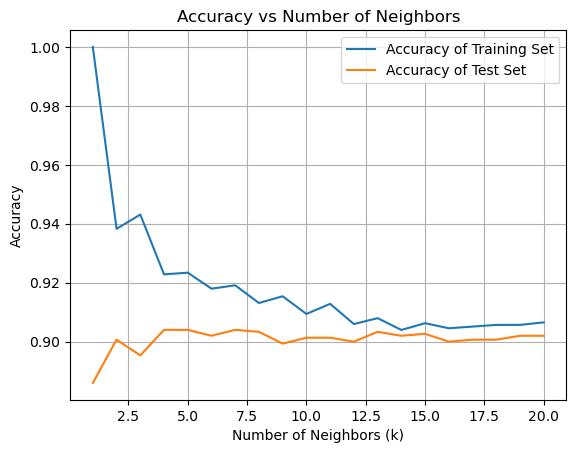

Max accuracy is: 0.904 at k = 4
Min accuracy is: 0.886 at k = 1


In [123]:
k = 20
accuracy = np.zeros((k))
train_acc = []
test_acc = []

for i in range(1, 21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train.ravel())
    y_pred = clf.predict(x_test)
    accuracy[i - 1] = metrics.accuracy_score(y_test, y_pred)
    train_acc.append(clf.score(x_train, y_train))  
    test_acc.append(clf.score(x_test, y_test))    
    
# Plotting accuracy
plt.plot(range(1, 21), train_acc, label="Accuracy of Training Set")
plt.plot(range(1, 21), test_acc, label="Accuracy of Test Set")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Neighbors")
plt.legend()
plt.grid()
plt.show()

print("Max accuracy is:", np.max(accuracy), "at k =", np.argmax(accuracy) + 1)
print("Min accuracy is:", np.min(accuracy), "at k =", np.argmin(accuracy) + 1)


In [124]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.904

In [125]:
confusion_matrix(y_test, y_pred)

array([[1335,   18],
       [ 126,   21]], dtype=int64)

*KNN and CV*

In [127]:
from sklearn.model_selection import GridSearchCV

cv_values = range(3, 10)                         # range for number of cross validation folders 
parameters = {"n_neighbors": range(1, 50)}       # range for K neighbors 

best_cv = None
best_accuracy = 0.0 

for cv in cv_values:                        # Iterate over each value of cv
    grid_knn = GridSearchCV(estimator=KNeighborsClassifier(),     # Create GridSearchCV object
                             param_grid=parameters, 
                             scoring="accuracy",
                             cv=cv,
                             verbose=0,
                             n_jobs=-1)
    
    grid_knn.fit(x_train, y_train.ravel())
    
    accuracy = grid_knn.best_score_                 # Get the best accuracy score
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_cv = cv

print("Best number of folds (cv):", best_cv)
print("Best accuracy score:", best_accuracy)


Best number of folds (cv): 6
Best accuracy score: 0.9054024021554391


In [128]:
grid_knn.best_params_                      

{'n_neighbors': 20}

In [136]:
# Get the best model from GridSearchCV

best_knn_model = grid_knn.best_estimator_
y_pred_knn = best_knn_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred_knn)
accuracy = metrics.accuracy_score(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print (classification_report(y_test, best_knn_model.predict(x_test)))

Confusion Matrix:
[[1348    5]
 [ 142    5]]
Accuracy: 0.902
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1353
           1       0.50      0.03      0.06       147

    accuracy                           0.90      1500
   macro avg       0.70      0.52      0.51      1500
weighted avg       0.87      0.90      0.86      1500



In [139]:
 algrthms = {
    'Report': ['Model Accuracy', 'TP', 'TN' , 'FP', 'FN', 'f1Score'],  
    'LogReg': ['0.937', '269', '4434', '85', '211', '0.94'], 
    'GaussianNB': ['0.905', '184', '3422' , '200', '192', '0.90'],
    'MultinomialNB': ['0.921', '149', '3538' , '90', '221', '0.92'],
    'BernouliNB': ['0.9144', '170', '4412' , '107', '310', '0.92'],
    'CategoricalNB': ['0.9328', '113', '3775' , '5', '271', '0.93'],
    'KNearest_N ': ['0.902', '5', '1348' , '5', '142', '0.90'],
}

Report_Table = pd.DataFrame(algrthms)
Report_Table 

,Report,LogReg,GaussianNB,MultinomialNB,BernouliNB,CategoricalNB,KNearest_N
0,Model Accuracy,0.937,0.905,0.921,0.9144,0.9328,0.902
1,TP,269,184,149,170,113,5
2,TN,4434,3422,3538,4412,3775,1348
3,FP,85,200,90,107,5,5
4,FN,211,192,221,310,271,142
5,f1Score,0.94,0.90,0.92,0.92,0.93,0.90


# Descussion
**Based on the models so far:**
- The best accuracy score is for LogReg algorithm, and then CategoricalNB 
- For this model, the purpose of model prediction is to increase the sale in the bank by offering potential customers 
- TN and TP should be increased with more emphasis on TP , in both LogReg performs better 
- FP should be larger than FN, because od the target in increasing the sale chance, again LogReg is a better model. 

# Therefore, based on the characterization reports and the given discussion, LogReg is offered for training the model. 